In [1]:
# GitHub Clone

!git clone https://github.com/misbah4064/yolo-license-plate-detection.git

Cloning into 'yolo-license-plate-detection'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), done.


In [2]:
%cd yolo-license-plate-detection

/content/yolo-license-plate-detection


In [3]:
# Weights

!gdown https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc

Downloading...
From: https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc
To: /content/yolo-license-plate-detection/model.weights
245MB [00:02, 95.3MB/s]


In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def objectDetector(img):
    yolo = cv2.dnn.readNet("model.weights", "darknet-yolov3.cfg")
    classes = []

    with open("classes.names", "r") as file:
        classes = [line.strip() for line in file.readlines()]
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

    colorRed = (0,0,255)
    colorGreen = (0,255,0)
    colorWhite = (255,255,255)

    height, width, channels = img.shape

    # # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x + w, y + h), colorGreen, 3)
            print("x : ", x)
            print("y : ", y)
            print("w : ", w)
            print("h : ", h)
            license_plate = img[y:y+h, x:x+w].copy()
            cv2_imshow(license_plate)
            cv2.imwrite('/content/yolo-license-plate-detection/license_plate.jpg', license_plate)
            # cv2.putText(img, label, (x, y - 30), cv2.FONT_HERSHEY_PLAIN, 3, colorWhite, 2)
    return img

In [7]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

x :  304
y :  323
w :  152
h :  36


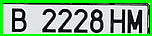

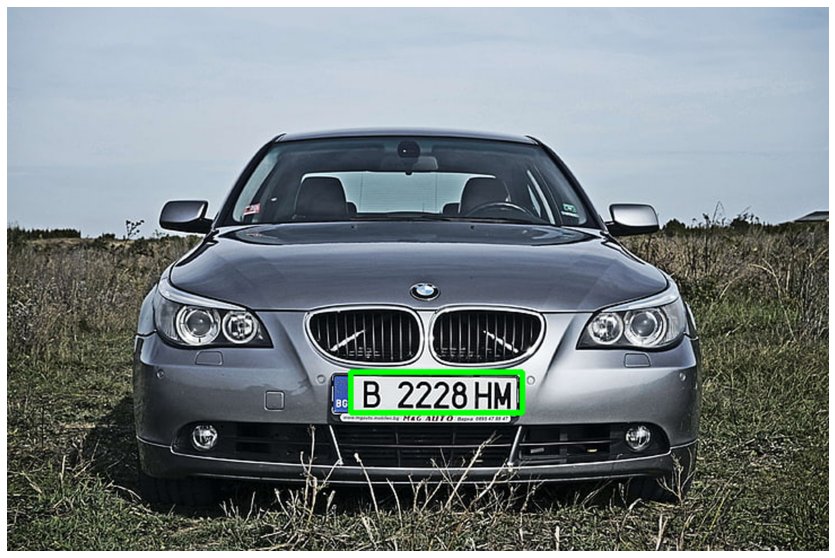

In [84]:
input_image = cv2.imread("k16.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

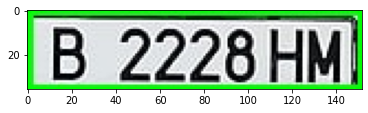

In [85]:
license_plate_part = cv2.imread('license_plate.jpg')
plt.imshow(cv2.cvtColor(license_plate_part, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
!pip install pytesseract

In [31]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [32]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract

In [33]:
!which tesseract

/usr/bin/tesseract


In [34]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [86]:
img_read = cv2.imread(r'license_plate.jpg')
print(pytesseract.image_to_string(img_read, config='-psm 1'))

B 2228HM

